In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/home/etienne/thesis/datasets/mammography/dataset.csv")

In [3]:
data

,age_c,assess_c,cancer_c,compfilm_c,density_c,famhx_c,hrt_c,prvmam_c,biophx_c,mammtype,CaTypeO,bmi_c,ptid
0,62,1,0,1,2,0,0,1,0,1,8,24.023544,1
1,65,1,0,1,4,0,0,1,0,1,8,-99.000000,2
2,69,0,0,1,2,0,0,1,0,1,8,29.052429,3
3,64,2,0,1,2,0,0,1,0,1,8,-99.000000,4
4,63,3,0,1,2,0,0,1,1,1,8,33.729523,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,80,1,0,1,1,0,0,1,0,1,8,-99.000000,36711
39996,78,1,0,1,3,0,0,1,0,1,8,-99.000000,36712
39997,77,1,0,1,2,0,0,1,0,1,8,-99.000000,36712
39998,66,1,0,1,2,0,0,1,1,1,8,-99.000000,36713


In [4]:
data[data["cancer_c"] == 1]

,age_c,assess_c,cancer_c,compfilm_c,density_c,famhx_c,hrt_c,prvmam_c,biophx_c,mammtype,CaTypeO,bmi_c,ptid
127,87,0,1,1,3,0,0,1,0,1,2,27.520645,116
430,76,0,1,1,2,0,0,1,1,1,2,21.632889,393
523,80,0,1,1,2,0,0,1,1,2,2,19.968811,477
947,68,0,1,1,3,0,0,1,0,2,2,-99.000000,864
963,67,4,1,1,1,0,0,1,0,2,2,-99.000000,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39162,78,0,1,1,3,0,0,1,1,1,2,-99.000000,35950
39430,79,0,1,1,1,1,0,1,0,1,2,27.397202,36192
39435,69,0,1,1,2,1,0,1,0,2,2,-99.000000,36196
39500,60,0,1,1,2,0,0,1,0,1,1,29.284851,36258


In [5]:
from abduction_memorability.memory import Memory
mem = Memory()

In [6]:
from abduction_memorability.event import Event
events = []
for index, line in data.iloc[:1000].iterrows():
    events.append(
        Event(timestamp=-1, characteristics=line.to_dict())
    )
print(len(events))

1000


In [7]:
mem = Memory(events)

In [8]:
len(mem)

1000

In [9]:
from abduction_memorability.predicate import Predicate, AxisRankPredicate
from abduction_memorability.helpers import Helpers

In [28]:
class OldPredicate(Predicate):
    def __init__(self, mem: Memory, prog: int):
        super().__init__(mem, prog)

    def __call__(self, event: Event):
        try:
            temp = self._mem.get_kth_along_axis("age_c", self._prog)
            if len(temp) == 0:
                return None
            return event in temp
        except Exception:
            return None

    def __str__(self):
        return f"Old({self._prog})" 

class YoungPredicate(Predicate):
    def __init__(self, mem, prog):
        super().__init__(mem, prog)
    
    def __call__(self, event):
        try:
            tmp = self._mem.get_kth_along_axis("age_c", self._prog, revert=False)
            if len(tmp) == 0:
                return None
            return event in tmp
        except Exception:
            return None
    
    def __str__(self):
        return f"Young({self._prog})"

class RandomPickPredicate(Predicate):
    def __init__(self, mem: Memory, prog: int):
        super().__init__(mem, prog)

    def __call__(self, event: Event):
        try:
            if self._prog > self._mem.get_biggest_id():
                return None
            counter = 0
            return event == self._mem.get_event_by_id(self._prog)
            # for mem_event in self._mem:
            #     if event == mem_event:
            #         return counter == self._prog
            #     counter += 1
        except Exception:
            return None
    
    def program_length(self):
        return Helpers.bit_length(len(self._mem))

    def __str__(self):
        return f'RandomPick({self._prog})'

Loaded the memory with 1000 items!
Computing complexities with 3 passes
Starting pass 0 of length 1 
Finished pass 0 in 50.97055268287659s.
Improved complexity for 1000 event(s)


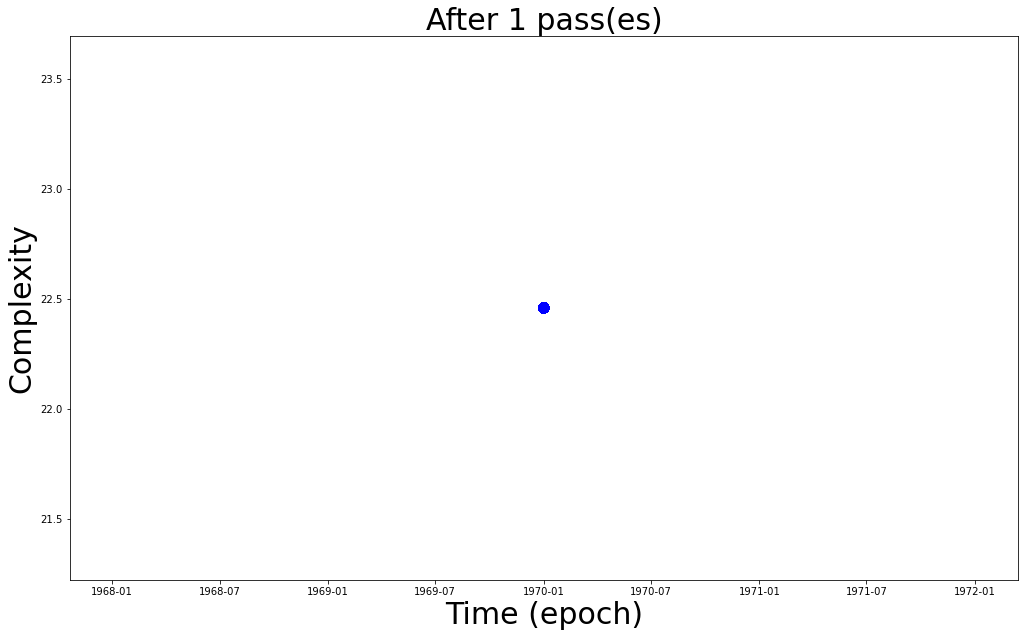

Starting pass 1 of length 61 
Finished pass 1 in 25.795933723449707s.
Improved complexity for 172 event(s)


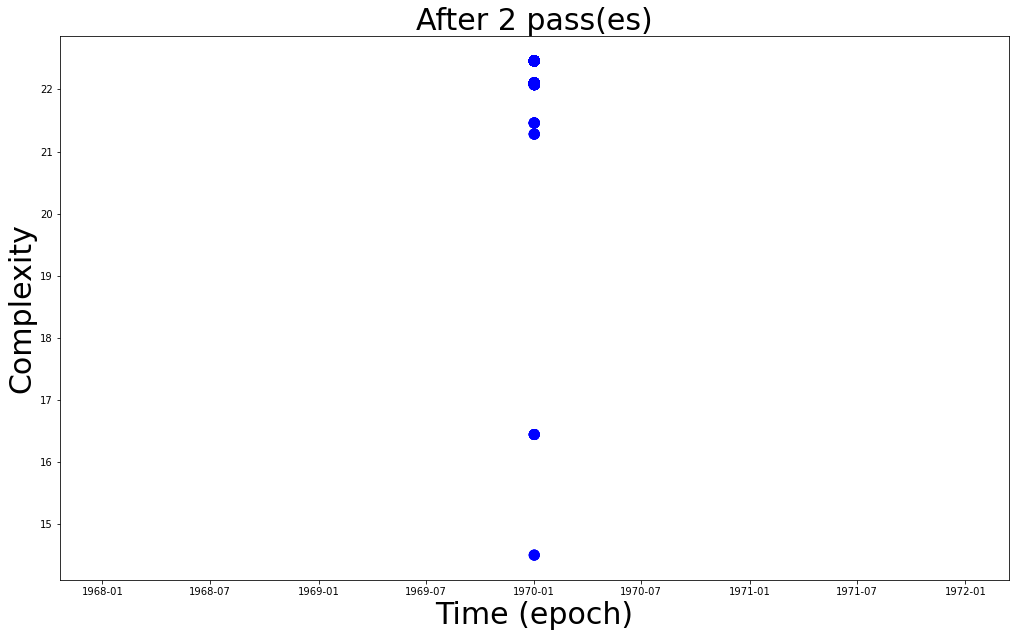

Computing surprise scores for all events !


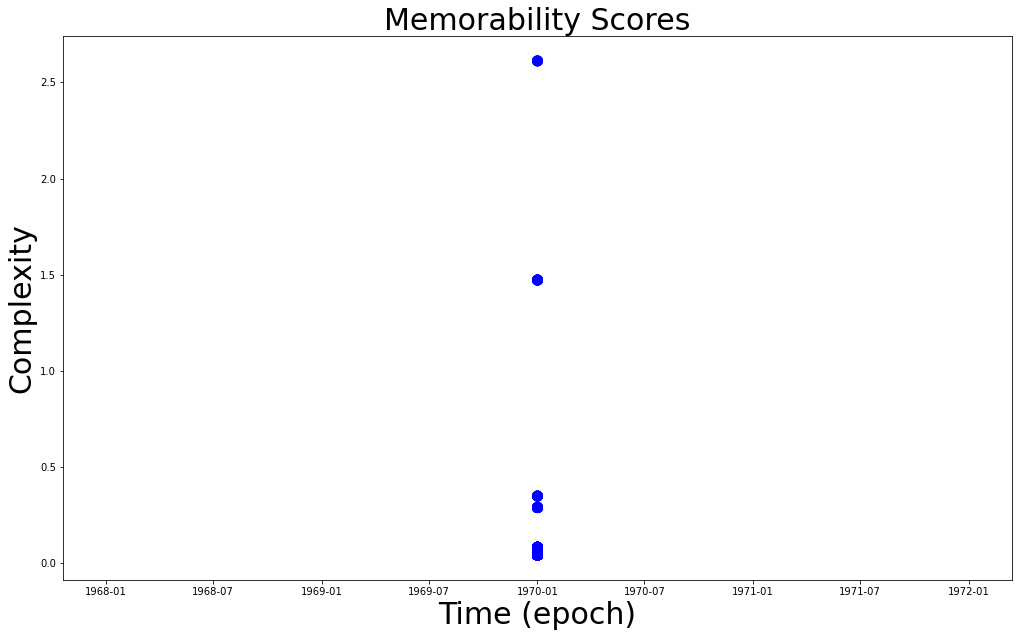

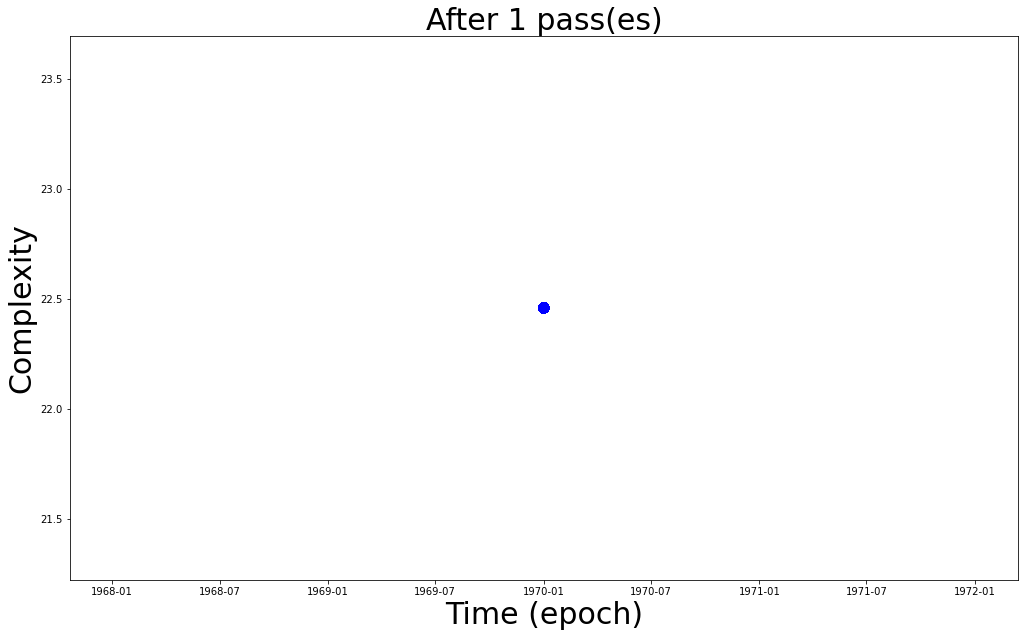

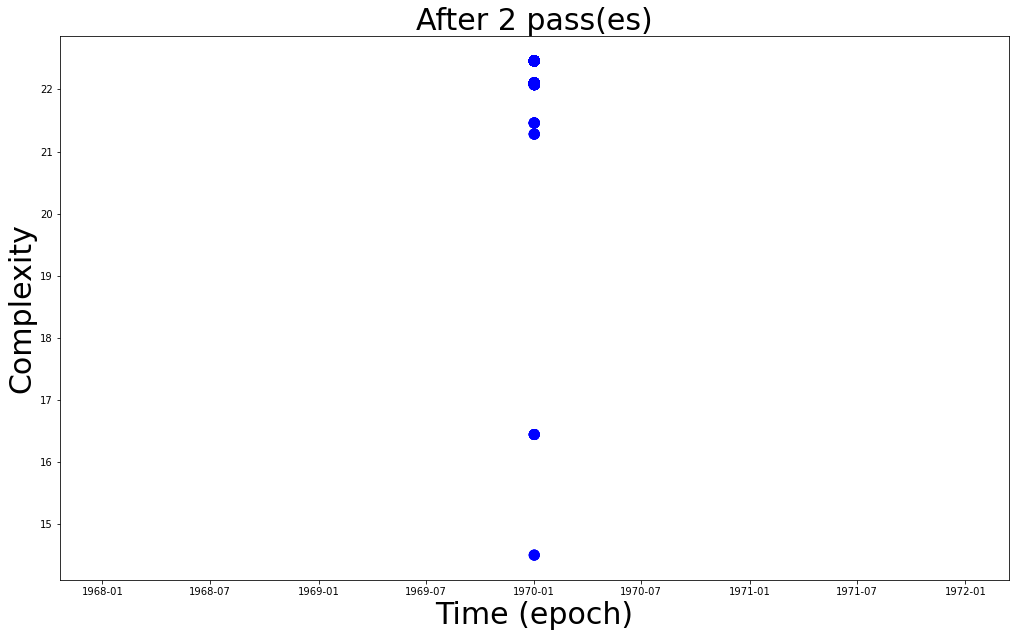

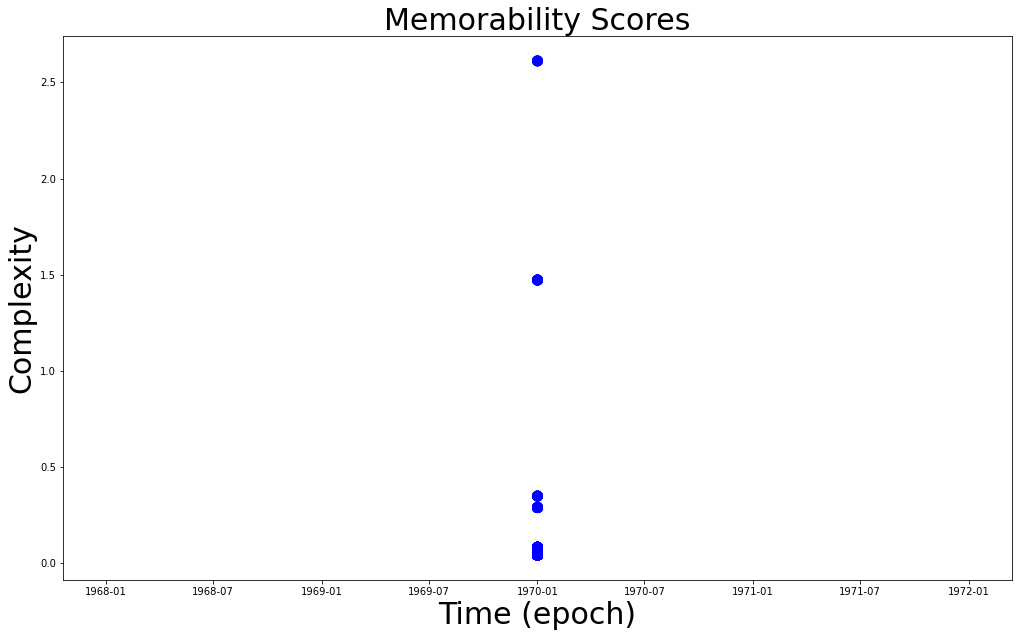

In [29]:
from abduction_memorability.abduction_module import SurpriseAbductionModule
module = SurpriseAbductionModule(
    memory=mem,
    predicates=[
        OldPredicate,
        YoungPredicate,
        RandomPickPredicate
    ],
    max_depth=3
)

In [40]:
# for id in range(200):
#     event = module.get_event_by_id(id)
#     if len(module.get_event_recipe(id)) > 1:
#         print(event.get_id(), event.get_char("age_c"), module.get_event_complexity(id), " -> ".join([str(pred.program_length()) for pred in module.get_event_recipe(id)]))
#     # print(module.get_event_complexity(id))

for pred in module.get_event_recipe(102):
    print(pred)

RandomPick(102)


In [20]:
pred = RandomPickPredicate(mem, 10)
print(mem.get_biggest_id())
for e in mem:
    if (pred(e)):
        print(e)

999
Event(timestamp=-1, characteristics={'age_c': 78.0, 'assess_c': 1.0, 'cancer_c': 0.0, 'compfilm_c': 1.0, 'density_c': 2.0, 'famhx_c': 0.0, 'hrt_c': 0.0, 'prvmam_c': 1.0, 'biophx_c': 0.0, 'mammtype': 1.0, 'CaTypeO': 8.0, 'bmi_c': -99.0, 'ptid': 11.0}, label=event, duration=-1, _id=10)


In [ ]:
mem.get_kth_along_axis("age_c", 3000)

[]